In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

### Health Vulnerability Clustering Analysis 

In [2]:
tracts_with_features_nyc_gdf = gpd.read_file('./data/tracts_with_features_nyc.geojson', driver='GeoJSON')
tracts_with_features_upstate_gdf = gpd.read_file('./data/tracts_with_features_upstate.geojson', driver='GeoJSON')

In [3]:
# Select features for K-means clustering
columns_vulnerability = [ 
        'unserved medicaid enrollees / km2',
        'binge drinking', 'sleeping less than 7 hours',
        'cholesterol screening', 'current lack of health insurance',
        'taking medicine for high blood pressure', 'visits to dentist or dental clinic',
        'visits to doctor for routine checkup', 'physical health not good for >=14 days',
        'under 18years', '18 to 64years', '65year and over', 
        'white', 'black or african american', 'asian', 'hispanic or latino'
       ]

cluster_df = tracts_with_features_nyc_gdf[columns_vulnerability]

In [4]:
# Scale our features data to range between 0 and 1
# To do so we use the MinMaxScaler
# Note that this outputs a numpy array
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Transform the data
X = scaler.fit_transform(cluster_df)
print(type(X))
display(pd.DataFrame(X,columns=cluster_df.columns))

<class 'numpy.ndarray'>


,unserved medicaid enrollees / km2,binge drinking,sleeping less than 7 hours,cholesterol screening,current lack of health insurance,taking medicine for high blood pressure,visits to dentist or dental clinic,visits to doctor for routine checkup,physical health not good for >=14 days,under 18years,18 to 64years,65year and over,white,black or african american,asian,hispanic or latino
0,0.000000,0.552239,0.385870,0.775785,0.045627,0.699324,0.791080,0.521978,0.170068,0.284965,0.553753,0.323877,0.854125,0.001036,0.117647,0.099890
1,0.126343,0.358209,0.548913,0.466368,0.653992,0.445946,0.330986,0.445055,0.571429,0.451049,0.567951,0.082742,0.182093,0.418653,0.019152,0.636663
2,0.115398,0.291045,0.548913,0.515695,0.581749,0.543919,0.356808,0.538462,0.598639,0.323427,0.541582,0.286052,0.128773,0.524352,0.015048,0.656422
3,0.116576,0.373134,0.494565,0.488789,0.562738,0.435811,0.408451,0.461538,0.476190,0.358392,0.643002,0.120567,0.123742,0.212435,0.000000,0.845225
4,0.102550,0.223881,0.478261,0.511211,0.718631,0.614865,0.312207,0.549451,0.707483,0.368881,0.421907,0.364066,0.146881,0.419689,0.000000,0.756312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.040361,0.410448,0.668478,0.726457,0.269962,0.604730,0.478873,0.736264,0.333333,0.402098,0.541582,0.179669,0.202213,0.538860,0.046512,0.282108
674,0.010581,0.544776,0.081522,0.905830,0.003802,0.706081,0.910798,0.686813,0.081633,0.148601,0.545639,0.517730,0.669014,0.132642,0.175103,0.037322
675,0.010487,0.358209,0.668478,0.950673,0.076046,0.753378,0.713615,0.961538,0.197279,0.239510,0.537525,0.404255,0.016097,0.872539,0.000000,0.045005
676,0.023365,0.358209,0.635870,0.959641,0.064639,0.770270,0.741784,0.972527,0.176871,0.136364,0.523327,0.560284,0.053320,0.923316,0.002736,0.036224


C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:13

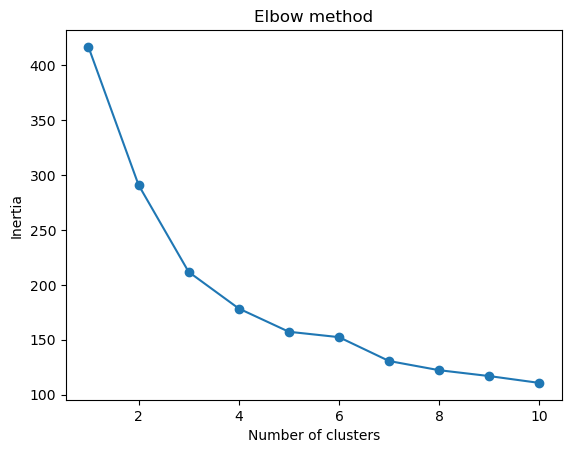

In [5]:
# Apply the elbow method to consider appropriate cluster size
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans_elbow = KMeans(n_clusters=i, n_init="auto")
    kmeans_elbow.fit(X)
    inertias.append(kmeans_elbow.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [6]:
# Conduct the K-means analysis
# First defining a variable to control number of k categories
n_k = 4
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=n_k, random_state=0, n_init="auto").fit(X)
# Display out cluster center means
display(pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns))

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,unserved medicaid enrollees / km2,binge drinking,sleeping less than 7 hours,cholesterol screening,current lack of health insurance,taking medicine for high blood pressure,visits to dentist or dental clinic,visits to doctor for routine checkup,physical health not good for >=14 days,under 18years,18 to 64years,65year and over,white,black or african american,asian,hispanic or latino
0,0.2453,0.4593,0.5198,0.5206,0.5721,0.4915,0.3532,0.4311,0.4728,0.3246,0.5754,0.2451,0.1977,0.2756,0.0845,0.6563
1,0.0754,0.6180,0.2521,0.7387,0.1296,0.6275,0.6884,0.4743,0.2256,0.3261,0.4565,0.3817,0.6999,0.0535,0.1606,0.1622
2,0.0749,0.4336,0.7190,0.8047,0.1755,0.6494,0.5540,0.7652,0.2681,0.2393,0.5836,0.3508,0.0798,0.7544,0.0591,0.1318
3,0.0837,0.4335,0.4128,0.6856,0.2705,0.5837,0.5171,0.4686,0.2494,0.2356,0.5852,0.3540,0.2749,0.0926,0.5270,0.2619


[1 0 0 0 0 0 0 0 1 2 2 2 2 0 1 2 2 2 2 2 2 1 1 2 3 3 2 2 3 2 2 2 2 2 0 0 3
 0 3 3 3 3 0 0 3 0 3 3 3 0 0 0 2 2 0 2 0 2 0 2 0 0 2 3 3 3 3 3 1 1 3 3 3 3
 3 3 2 3 2 2 2 2 2 2 2 2 3 2 2 0 3 2 2 2 2 2 2 2 2 2 3 2 2 3 3 2 2 2 2 1 2
 1 1 3 3 3 2 0 0 0 0 0 1 1 3 0 3 3 0 2 2 2 0 3 3 2 2 2 1 3 3 3 3 3 3 2 3 2
 3 3 0 2 3 2 2 2 0 1 3 3 3 0 0 3 0 3 0 3 0 3 0 3 0 2 2 3 3 1 0 2 3 3 3 3 1
 3 3 2 2 1 0 2 2 3 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 1 3 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 3 0 0 2 0 3 3 0 1 2
 0 0 1 1 1 2 0 2 0 2 2 1 1 1 1 2 2 0 3 3 1 3 3 2 1 2 1 1 1 1 2 2 3 2 3 2 3
 3 3 3 1 1 1 3 2 2 3 0 3 3 3 3 3 3 1 2 1 3 1 1 0 3 3 3 3 1 3 1 1 1 1 1 1 0
 0 1 1 1 2 2 2 2 2 1 1 2 2 1 3 1 3 1 1 1 1 1 3 3 3 3 1 2 2 1 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 3 3 3 3 3 3 1 3 1 2 3 2 2 2 2 2 3 1 2 3 2 2 3 2 2 2 2
 2 3 0 0 2 3 1 0 0 0 3 3 1 0 1 0 0 0 3 1 3 1 1 3 0 0 2 1 2 1 1 3 3 3 1 1 3
 1 1 3 2 2 1 1 3 2 1 1 1 1 1 1 1 1 2 2 2 2 1 1 0 1 2 1 1 3 2 2 1 1 1 3 3 3
 1 2 2 0 1 2 0 0 1 3 2 2 

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


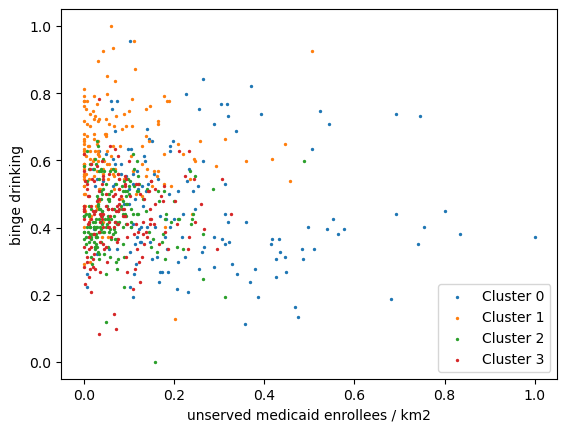

In [7]:
# Predict and visualize the clusters using pairs of features
# First make the predictions 
y_label = kmeans_model.fit_predict(X)
print(y_label)

# Then do some  looping to plot clusters for pairs of features 
columnx = 0
columny = 1
for i in range(0,n_k):
    plt.scatter(X[y_label==i, columnx], X[y_label==i, columny], s=2, label ='Cluster '+str(i))

plt.xlabel(cluster_df.columns[columnx])
plt.ylabel(cluster_df.columns[columny])
plt.legend(loc="lower right")
plt.show()

In [9]:
# Get cluster centers
cluster_centers_vulnerability = pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns)
cluster_centers_vulnerability.to_csv('cluster_centers_profitability.csv', index=False)

#Add cluster assignments to the original DataFrame and export it
tracts_with_features_nyc_gdf['cluster_health_vulnerability'] = kmeans_model.labels_
tracts_with_features_nyc_gdf.to_file('cluster_vulnerability.geojson', driver='GeoJSON')

### Profitability Clustering Analysis on the Vulnerability Cluster1

In [14]:
# Get census tracts with vulnerability cluster1
tracts_with_features_nyc_gdf = tracts_with_features_nyc_gdf[tracts_with_features_nyc_gdf['cluster_health_vulnerability'] == 0]

# Select features for K-means clustering
columns_profitability = [
    'insured population / km2', 'unserved commercial enrollees / km2',
    'median household income',  
    'median monthly housing cost', 'average land price / ft2'
]

cluster_df = tracts_with_features_nyc_gdf[columns_profitability]

In [16]:
# Scale our features data to range between 0 and 1
# To do so we use the MinMaxScaler
# Note that this outputs a numpy array
scaler = MinMaxScaler()
# Transform the data
X = scaler.fit_transform(cluster_df)
print(type(X))
display(pd.DataFrame(X,columns=cluster_df.columns))

<class 'numpy.ndarray'>


,insured population / km2,unserved commercial enrollees / km2,median household income,median monthly housing cost,average land price / ft2
0,0.228298,0.0,0.297648,0.373642,0.266137
1,0.280277,0.0,0.223908,0.234975,0.159550
2,0.250676,0.0,0.360992,0.360608,0.147964
3,0.384289,0.0,0.079322,0.147719,0.167825
4,0.343214,0.0,0.097957,0.395366,0.238663
...,...,...,...,...,...
149,0.281991,0.0,0.291277,0.384504,0.464416
150,0.586394,0.0,0.167412,0.433382,0.471698
151,0.242982,0.0,0.073035,0.218682,0.102946
152,0.201116,0.0,0.043236,0.239319,0.166170


C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:13

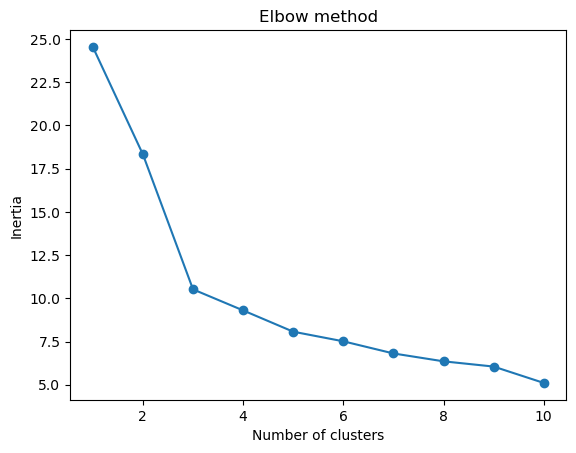

In [17]:
# Apply the elbow method to consider appropriate cluster size
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans_elbow = KMeans(n_clusters=i, n_init="auto")
    kmeans_elbow.fit(X)
    inertias.append(kmeans_elbow.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [18]:
# Conduct the K-means analysis
# First defining a variable to control number of k categories
n_k = 3
kmeans_model = KMeans(n_clusters=n_k, random_state=0, n_init="auto").fit(X)
# Display out cluster center means
display(pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns))

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,insured population / km2,unserved commercial enrollees / km2,median household income,median monthly housing cost,average land price / ft2
0,0.5984,-0.0000,0.3592,0.4258,0.5954
1,0.3107,0.0170,0.1834,0.2745,0.2107
2,0.1845,0.0007,0.5723,0.5562,0.1868


[1 1 1 1 1 1 1 2 2 2 0 2 2 0 0 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 0 0 1 1 1 1 1 1 1 2 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1
 2 2 2 2 2 2 2 1 1 1 1 2 2 2 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 0 1 1
 1 0 1 1 1 1 0 0 2 1 1 0 2 1 1 1 1 1 1 2 1 1 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 0 1 1 1]


C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


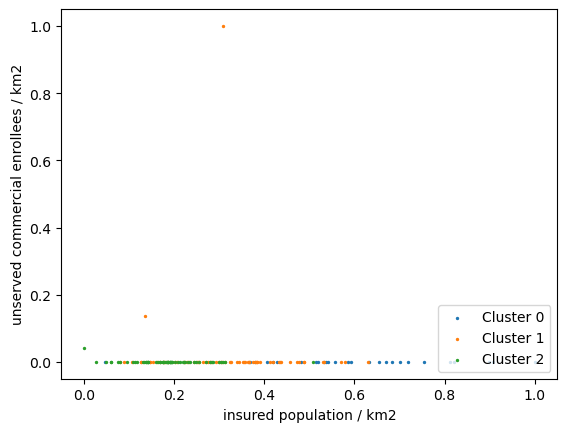

In [19]:
# Predict and visualize the clusters using pairs of features
# First make the predictions 
y_label = kmeans_model.fit_predict(X)
print(y_label)

# Then do some  looping to plot clusters for pairs of features 
columnx = 0
columny = 1
for i in range(0,n_k):
    plt.scatter(X[y_label==i, columnx], X[y_label==i, columny], s=2, label ='Cluster '+str(i))

plt.xlabel(cluster_df.columns[columnx])
plt.ylabel(cluster_df.columns[columny])
plt.legend(loc="lower right")
plt.show()

In [20]:
# Get cluster centers
cluster_centers_profitability = pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns)
cluster_centers_profitability.to_csv('cluster_centers_profitability.csv', index=False)

#Add cluster assignments to the original DataFrame and export it
tracts_with_features_nyc_gdf['cluster_profitability'] = kmeans_model.labels_
tracts_with_features_nyc_gdf.to_file('cluster_profitability.geojson', driver='GeoJSON')

### Built Environment Clustering Analysis on the Profitabiliy Cluster2

In [26]:
# Get census tracts with vulnerability cluster1
tracts_with_features_nyc_gdf = tracts_with_features_nyc_gdf[tracts_with_features_nyc_gdf['cluster_profitability'] == 1]

# Select features for K-means clustering
columns_built_environment = [
    'vacant land percent', 'commercial district percent',
    'residential district percent', 'agricultural land percent',
    'industrial district percent', 'drove alone percent',
    'carpooled percent', 'public transit percent', 'walked percent',
    'worked from home percent',
]

cluster_df = tracts_with_features_nyc_gdf[columns_built_environment]

In [27]:
# Scale our features data to range between 0 and 1
# To do so we use the MinMaxScaler
# Note that this outputs a numpy array
scaler = MinMaxScaler()
# Transform the data
X = scaler.fit_transform(cluster_df)
print(type(X))
display(pd.DataFrame(X,columns=cluster_df.columns))

<class 'numpy.ndarray'>


,vacant land percent,commercial district percent,residential district percent,agricultural land percent,industrial district percent,drove alone percent,carpooled percent,public transit percent,walked percent,worked from home percent
0,0.352941,0.145833,0.583333,0.0,0.000,0.326531,0.000000,0.626866,0.038462,0.214286
1,0.470588,0.208333,0.513889,0.0,0.000,0.081633,0.176471,0.716418,0.134615,0.178571
2,0.235294,0.166667,0.722222,0.0,0.125,0.346939,0.235294,0.432836,0.211538,0.178571
3,0.529412,0.062500,0.722222,0.0,0.000,0.489796,0.117647,0.417910,0.153846,0.214286
4,0.470588,0.145833,0.625000,0.0,0.000,0.326531,0.235294,0.522388,0.173077,0.142857
...,...,...,...,...,...,...,...,...,...,...
62,0.058824,0.229167,0.708333,0.0,0.000,0.367347,0.235294,0.477612,0.134615,0.214286
63,0.235294,0.125000,0.819444,0.0,0.000,0.387755,0.294118,0.597015,0.057692,0.071429
64,0.117647,0.062500,0.736111,0.0,0.625,0.285714,0.470588,0.328358,0.192308,0.250000
65,0.352941,0.145833,0.736111,0.0,0.000,0.306122,0.000000,0.507463,0.153846,0.428571


C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:13

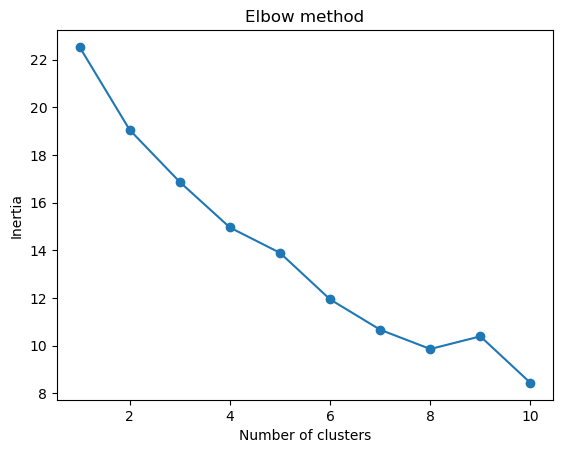

In [28]:
# Apply the elbow method to consider appropriate cluster size
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans_elbow = KMeans(n_clusters=i, n_init="auto")
    kmeans_elbow.fit(X)
    inertias.append(kmeans_elbow.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [29]:
# Conduct the K-means analysis
# First defining a variable to control number of k categories
n_k = 3
kmeans_model = KMeans(n_clusters=n_k, random_state=0, n_init="auto").fit(X)
# Display out cluster center means
display(pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns))

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,vacant land percent,commercial district percent,residential district percent,agricultural land percent,industrial district percent,drove alone percent,carpooled percent,public transit percent,walked percent,worked from home percent
0,0.3824,0.4844,0.1562,0.0,0.7188,0.1735,0.2941,0.5224,0.2163,0.2500
1,0.1056,0.1122,0.7578,0.0,0.0705,0.2972,0.2715,0.5270,0.1642,0.1548
2,0.3431,0.2318,0.5133,0.0,0.0781,0.3554,0.1544,0.4403,0.2059,0.2336


[2 2 1 2 2 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 2 0 2 1 1 2 1 1 1 2 2 1
 1 0 1 1 2 1 2 0 1 2 1 1 1 1 2 2 2 1 1 0 1 1 1 2 1 1 1 1 2 2]


C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


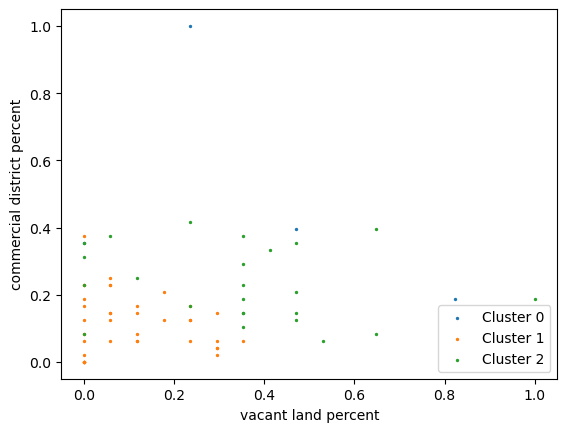

In [30]:
# Predict and visualize the clusters using pairs of features
# First make the predictions 
y_label = kmeans_model.fit_predict(X)
print(y_label)

# Then do some  looping to plot clusters for pairs of features 
columnx = 0
columny = 1
for i in range(0,n_k):
    plt.scatter(X[y_label==i, columnx], X[y_label==i, columny], s=2, label ='Cluster '+str(i))

plt.xlabel(cluster_df.columns[columnx])
plt.ylabel(cluster_df.columns[columny])
plt.legend(loc="lower right")
plt.show()

In [32]:
# Get cluster centers
cluster_centers_built_environment = pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns)
cluster_centers_built_environment.to_csv('cluster_centers_built_environment.csv', index=False)

#Add cluster assignments to the original DataFrame and export it
tracts_with_features_nyc_gdf['cluster_built_environment'] = kmeans_model.labels_
tracts_with_features_nyc_gdf.to_file('cluster_built_environment.geojson', driver='GeoJSON')